## Cohort Analysis

**A cohort is a group of users who share a common characteristic over a certain period of time. Cohort analysis is the study of these common characteristics of these users over a specific period.

In [19]:
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import plotly.express as px

In [20]:
df = pd.read_csv('Data_Set2.csv')
df.head()

,id,customer_id,location_id,channel,amount,bill_no,created_on
0,42877344,60,192,uber,1039,GGN001-24323,24-06-2018 00:00
1,35625005,134,535,takeaway,1029,DEL007-1522,14-01-2018 19:21
2,44397299,166,347,uber,355,DEL005-29173,13-09-2018 13:40
3,44405460,166,347,uber,371,DEL005-29180,13-09-2018 14:33
4,44717004,166,347,uber,371,DEL005-29603,16-09-2018 12:40


In [4]:
#Examining data for duplicate,null and redundant values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533327 entries, 0 to 533326
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           533327 non-null  int64 
 1   customer_id  533327 non-null  int64 
 2   location_id  533327 non-null  int64 
 3   channel      533327 non-null  object
 4   amount       533327 non-null  int64 
 5   bill_no      533327 non-null  object
 6   created_on   533327 non-null  object
dtypes: int64(4), object(3)
memory usage: 28.5+ MB


In [5]:
df.describe()

,id,customer_id,location_id,amount
count,5.333270e+05,5.333270e+05,533327.000000,533327.000000
mean,4.794955e+07,4.832702e+06,1500.813602,551.399865
std,7.987404e+06,3.424067e+06,1914.140397,1388.179206
min,3.561932e+07,6.000000e+01,192.000000,0.000000
25%,4.170082e+07,1.681087e+06,194.000000,304.000000
50%,4.692534e+07,5.880546e+06,272.000000,372.000000
75%,5.031443e+07,7.501177e+06,4003.000000,584.000000
max,6.392059e+07,1.165519e+07,5099.000000,604827.000000


In [6]:
df.duplicated().sum()
#No null duplicates were found

0

In [7]:
df.dtypes

id              int64
customer_id     int64
location_id     int64
channel        object
amount          int64
bill_no        object
created_on     object
dtype: object

In [8]:
df.isnull().sum(axis=0)
#No null values were found

id             0
customer_id    0
location_id    0
channel        0
amount         0
bill_no        0
created_on     0
dtype: int64

In [22]:
#To convert "created_on" attribute to python time format
df["created_on"]= pd.to_datetime(df["created_on"])
df

,id,customer_id,location_id,channel,amount,bill_no,created_on
0,42877344,60,192,uber,1039,GGN001-24323,2018-06-24 00:00:00
1,35625005,134,535,takeaway,1029,DEL007-1522,2018-01-14 19:21:00
2,44397299,166,347,uber,355,DEL005-29173,2018-09-13 13:40:00
3,44405460,166,347,uber,371,DEL005-29180,2018-09-13 14:33:00
4,44717004,166,347,uber,371,DEL005-29603,2018-09-16 12:40:00
...,...,...,...,...,...,...,...
533322,63920571,11655184,218,zomato,674,GGN004-49266,2019-10-04 14:21:00
533323,63920575,11655185,4002,dine in,1565,DEL009-26660,2019-10-04 10:11:00
533324,63920583,11655186,194,zomato,217,GGN002-70779,2019-10-04 15:44:00
533325,63920586,11655187,192,uber,252,GGN001-88302,2019-10-04 16:21:00


In [23]:
#function to get the months of each invoice number so that we can know on which month the order was placed
def get_month(x):
    return dt.datetime(x.year, x.month, 1)
df['InvoiceMonth'] = df['created_on'].apply(get_month)
df.head(5)

,id,customer_id,location_id,channel,amount,bill_no,created_on,InvoiceMonth
0,42877344,60,192,uber,1039,GGN001-24323,2018-06-24 00:00:00,2018-06-01
1,35625005,134,535,takeaway,1029,DEL007-1522,2018-01-14 19:21:00,2018-01-01
2,44397299,166,347,uber,355,DEL005-29173,2018-09-13 13:40:00,2018-09-01
3,44405460,166,347,uber,371,DEL005-29180,2018-09-13 14:33:00,2018-09-01
4,44717004,166,347,uber,371,DEL005-29603,2018-09-16 12:40:00,2018-09-01


In [24]:
#Grouping customers based on Invoice Month
grouping = df.groupby('customer_id')['InvoiceMonth']
grouping.head(2)

0        2018-06-01
1        2018-01-01
2        2018-09-01
3        2018-09-01
7        2018-01-01
            ...    
533322   2019-10-01
533323   2019-10-01
533324   2019-10-01
533325   2019-10-01
533326   2019-10-01
Name: InvoiceMonth, Length: 343046, dtype: datetime64[ns]

In [25]:
#Cohort month: the month in which first ever purchase made by a customer
df['CohortMonth'] = grouping.transform('min')
df.head(5)

,id,customer_id,location_id,channel,amount,bill_no,created_on,InvoiceMonth,CohortMonth
0,42877344,60,192,uber,1039,GGN001-24323,2018-06-24 00:00:00,2018-06-01,2018-06-01
1,35625005,134,535,takeaway,1029,DEL007-1522,2018-01-14 19:21:00,2018-01-01,2018-01-01
2,44397299,166,347,uber,355,DEL005-29173,2018-09-13 13:40:00,2018-09-01,2018-09-01
3,44405460,166,347,uber,371,DEL005-29180,2018-09-13 14:33:00,2018-09-01,2018-09-01
4,44717004,166,347,uber,371,DEL005-29603,2018-09-16 12:40:00,2018-09-01,2018-09-01


In [31]:
#Cohort index shows the time gap between first and recent purchase. If it's value 0 is that 
#implies orders were placed in the same month
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    date = df[column].dt.date
    return year, month, date

Invoice_Year, Invoice_Month, _ = get_date_int(df, 'InvoiceMonth')
Cohort_Year, Cohort_Month , _ = get_date_int(df, 'CohortMonth')

year_diff = Invoice_Year - Cohort_Year
month_diff = Invoice_Month - Cohort_Month

df['CohortIndex'] = year_diff * 12 + month_diff + 1

In [32]:
#‘groupby’ the customers by ‘CohortMonth’ and ‘CohortIndex’
#so that we can identify the customers who came to purchase in the same month with the same interval
grouping = df.groupby(['CohortMonth', 'CohortIndex'])
grouping.head(25)

,id,customer_id,location_id,channel,amount,bill_no,created_on,InvoiceMonth,CohortMonth,CohortIndex
0,42877344,60,192,uber,1039,GGN001-24323,2018-06-24 00:00:00,2018-06-01,2018-06-01,1
1,35625005,134,535,takeaway,1029,DEL007-1522,2018-01-14 19:21:00,2018-01-01,2018-01-01,1
2,44397299,166,347,uber,355,DEL005-29173,2018-09-13 13:40:00,2018-09-01,2018-09-01,1
3,44405460,166,347,uber,371,DEL005-29180,2018-09-13 14:33:00,2018-09-01,2018-09-01,1
4,44717004,166,347,uber,371,DEL005-29603,2018-09-16 12:40:00,2018-09-01,2018-09-01,1
...,...,...,...,...,...,...,...,...,...,...
530820,63809606,11625040,192,zomato,99,GGN001-87449,2019-07-04 08:13:00,2019-07-01,2019-04-01,4
531530,63920287,11635791,4594,zomato,99,GGN009-47332,2019-10-04 08:03:00,2019-10-01,2019-06-01,5
531546,63919981,11635803,346,zomato,496,GGN006-42438,2019-10-04 15:46:00,2019-10-01,2019-06-01,5
532143,63895968,11645589,194,dine in,0,GGN002-70536,2019-09-04 07:57:00,2019-09-01,2019-07-01,3


In [33]:
# take only the first month of each customer to calculate a pivot table
#so that we can calculate later the recurring customers
cohort_data = grouping['customer_id'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_data.head()

,CohortMonth,CohortIndex,customer_id
0,2018-01-01,1,22314
1,2018-01-01,2,4079
2,2018-01-01,3,3744
3,2018-01-01,4,3731
4,2018-01-01,5,3339


In [34]:
print(df.shape)
print(cohort_data.shape)

(533327, 10)
(300, 3)


In [35]:
cohort_counts = cohort_data.pivot(index="CohortMonth",
                                  columns="CohortIndex",
                                  values="customer_id")
retention = cohort_counts
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2018-01-01,22314.0,4079.0,3744.0,3731.0,3339.0,3691.0,3573.0,3311.0,3502.0,3355.0,...,2143.0,420.0,530.0,493.0,405.0,501.0,494.0,502.0,356.0,351.0
2018-02-01,17509.0,2014.0,2016.0,1901.0,1934.0,1957.0,1759.0,1994.0,1944.0,2163.0,...,218.0,291.0,283.0,252.0,303.0,259.0,296.0,195.0,202.0,NaN
2018-03-01,13437.0,1481.0,1307.0,1329.0,1274.0,1182.0,1258.0,1247.0,1393.0,1158.0,...,187.0,155.0,161.0,189.0,179.0,177.0,113.0,124.0,NaN,NaN
2018-04-01,13317.0,1139.0,1127.0,1111.0,960.0,1054.0,1024.0,1134.0,1030.0,589.0,...,138.0,134.0,153.0,127.0,131.0,103.0,98.0,NaN,NaN,NaN
2018-05-01,13483.0,1084.0,1038.0,890.0,962.0,950.0,1025.0,930.0,560.0,572.0,...,131.0,143.0,122.0,122.0,90.0,80.0,NaN,NaN,NaN,NaN
2018-06-01,15627.0,1118.0,922.0,1001.0,997.0,1117.0,960.0,544.0,615.0,731.0,...,128.0,145.0,141.0,105.0,107.0,NaN,NaN,NaN,NaN,NaN
2018-07-01,15920.0,881.0,980.0,931.0,1059.0,875.0,533.0,592.0,729.0,121.0,...,134.0,132.0,103.0,95.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-01,12597.0,756.0,679.0,750.0,685.0,420.0,498.0,621.0,82.0,121.0,...,115.0,72.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-01,16851.0,1087.0,1174.0,896.0,499.0,607.0,748.0,102.0,126.0,142.0,...,83.0,87.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
cohort_sizes = cohort_counts.iloc[:,0]
cohort_sizes.head()

CohortMonth
2018-01-01    22314.0
2018-02-01    17509.0
2018-03-01    13437.0
2018-04-01    13317.0
2018-05-01    13483.0
Name: 1, dtype: float64

In [37]:
cohort_sizes = cohort_counts.iloc[:,0]
cohort_sizes.head()
retention = cohort_counts.div(cohort_sizes, axis=0)

In [38]:
#To obtain 100% for first months
retention_round = retention.round(7) * 100
retention_round

CohortIndex,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2018-01-01,100.0,18.28000,16.77870,16.72044,14.96370,16.54118,16.01237,14.83822,15.69418,15.03540,...,9.60384,1.88223,2.37519,2.20938,1.81500,2.24523,2.21386,2.24971,1.59541,1.573
2018-02-01,100.0,11.50266,11.51408,10.85727,11.04575,11.17711,10.04626,11.38843,11.10286,12.35365,...,1.24507,1.66200,1.61631,1.43926,1.73054,1.47924,1.69056,1.11371,1.15369,NaN
2018-03-01,100.0,11.02181,9.72687,9.89060,9.48128,8.79661,9.36221,9.28035,10.36690,8.61800,...,1.39168,1.15353,1.19818,1.40656,1.33214,1.31726,0.84096,0.92283,NaN,NaN
2018-04-01,100.0,8.55298,8.46287,8.34272,7.20883,7.91470,7.68942,8.51543,7.73447,4.42292,...,1.03627,1.00623,1.14891,0.95367,0.98371,0.77345,0.73590,NaN,NaN,NaN
2018-05-01,100.0,8.03975,7.69858,6.60090,7.13491,7.04591,7.60217,6.89757,4.15338,4.24238,...,0.97159,1.06059,0.90484,0.90484,0.66751,0.59334,NaN,NaN,NaN,NaN
2018-06-01,100.0,7.15428,5.90004,6.40558,6.37998,7.14789,6.14321,3.48115,3.93550,4.67780,...,0.81910,0.92788,0.90228,0.67191,0.68471,NaN,NaN,NaN,NaN,NaN
2018-07-01,100.0,5.53392,6.15578,5.84799,6.65201,5.49623,3.34799,3.71859,4.57915,0.76005,...,0.84171,0.82915,0.64698,0.59673,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-01,100.0,6.00143,5.39017,5.95380,5.43780,3.33413,3.95332,4.92975,0.65095,0.96055,...,0.91292,0.57156,0.54775,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-01,100.0,6.45066,6.96695,5.31719,2.96125,3.60216,4.43891,0.60531,0.74773,0.84268,...,0.49255,0.51629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


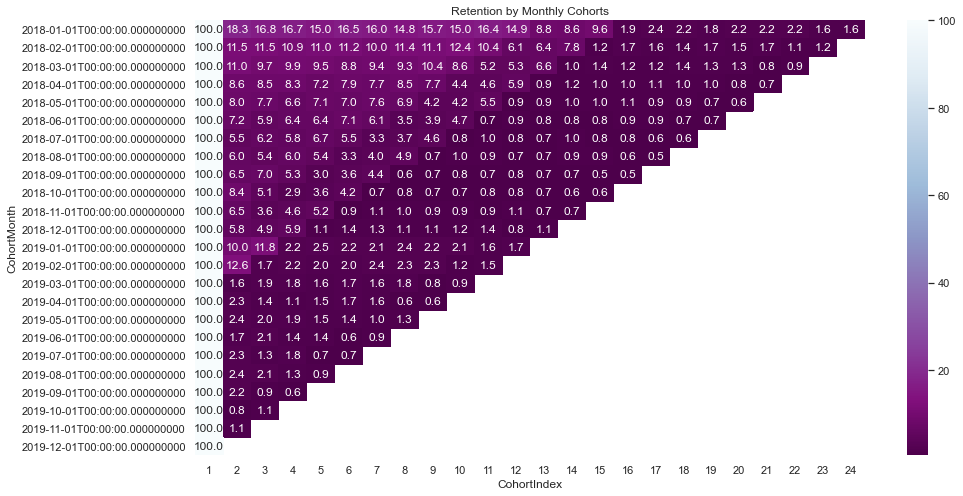

In [40]:
plt.figure(figsize=(15,8))
plt.title('Retention by Monthly Cohorts')
sns.heatmap(retention_round, annot=True, cmap="BuPu_r", fmt='.1f')
plt.show()

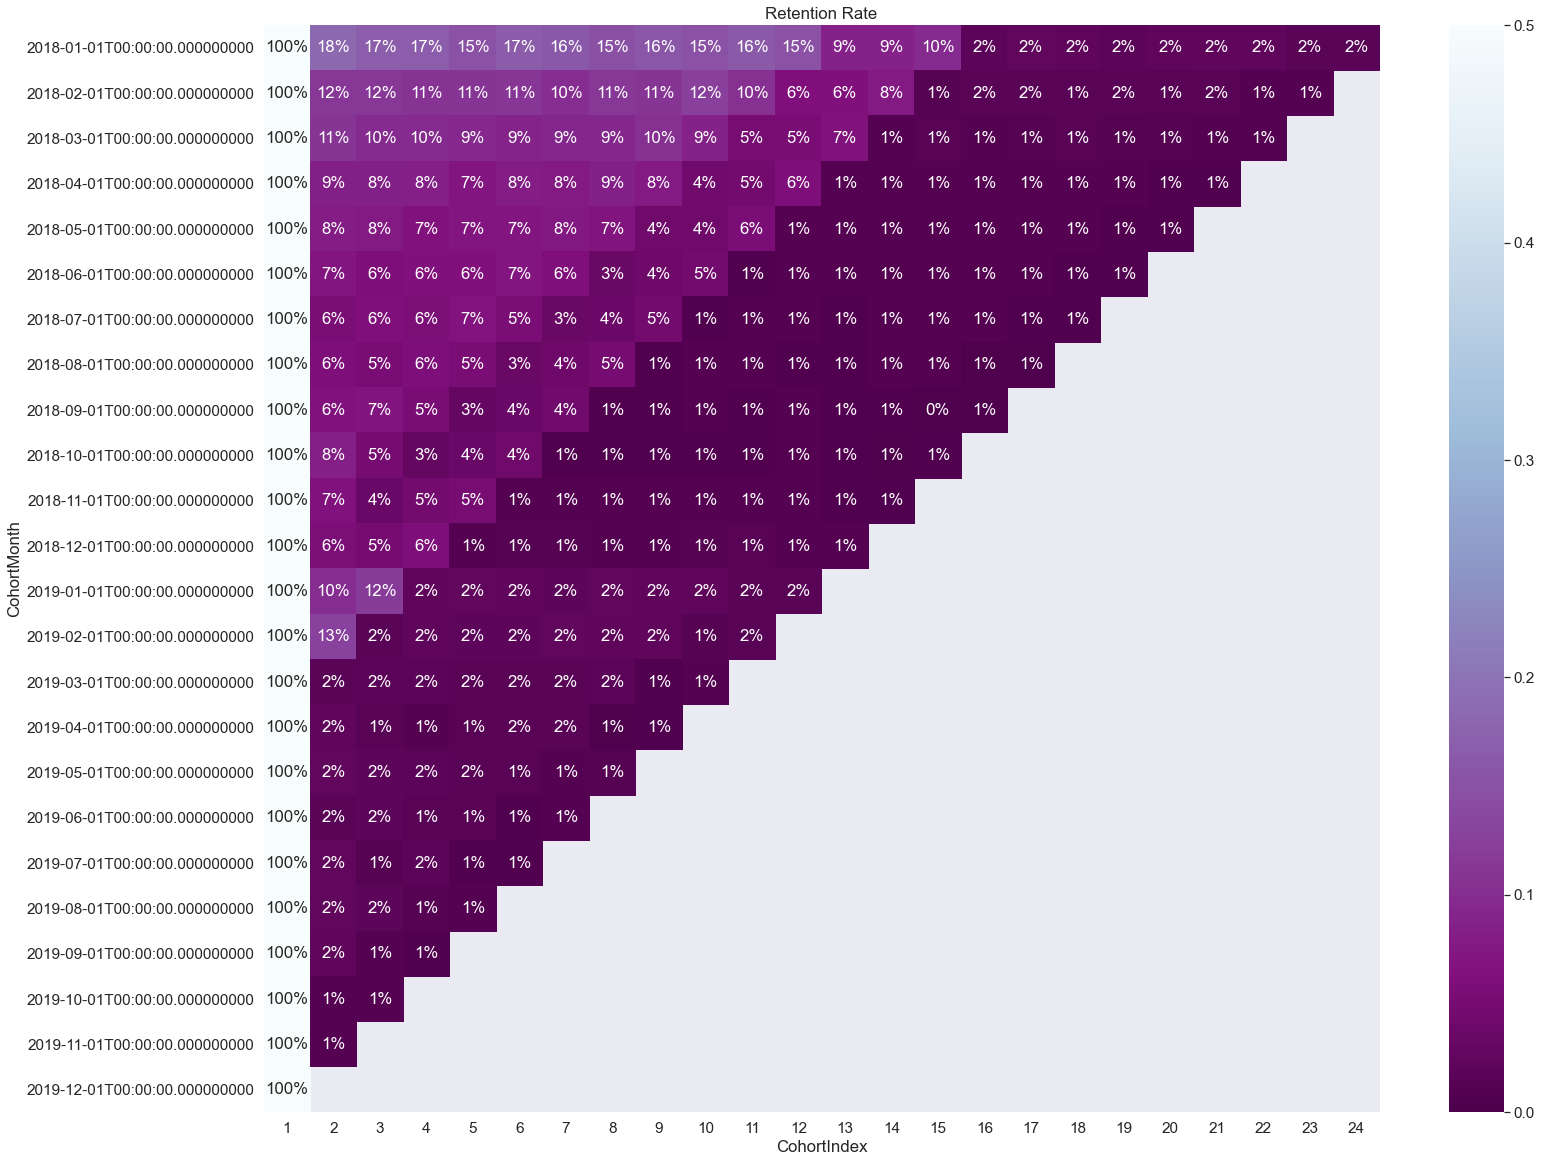

In [106]:
#The final Cohort heatmap indicating the percentile of customer rentention trend for different months 
#in the given time period
plt.figure(figsize=(25,20))
plt.title("Retention Rate")
sns.heatmap(data=retention,annot=True,fmt='.0%',vmin=0.0,vmax=0.5,cmap="BuPu_r")
plt.show()

###### The Frequency (Orders/Customers) trend can be obtained from the heatmap